In [7]:
import numpy as np
import pandas as pd
import tensorflow
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [8]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [10]:
filenames=os.listdir("train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [13]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [14]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [39]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
test_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "train",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.


In [18]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1333/1333 [==============================] - 1070s 787ms/step - loss: 0.9376 - accuracy: 0.6018 - val_loss: 0.6175 - val_accuracy: 0.6733
Epoch 2/10
1333/1333 [==============================] - 1098s 823ms/step - loss: 0.5743 - accuracy: 0.7024 - val_loss: 0.4902 - val_accuracy: 0.7648
Epoch 3/10
1333/1333 [==============================] - 1009s 756ms/step - loss: 0.5269 - accuracy: 0.7445 - val_loss: 0.5248 - val_accuracy: 0.7642
Epoch 4/10
1333/1333 [==============================] - 960s 720ms/step - loss: 0.4719 - accuracy: 0.7771 - val_loss: 0.4081 - val_accuracy: 0.8166
Epoch 5/10
1333/1333 [==============================] - 924s 693ms/step - loss: 0.4338 - accuracy: 0.7999 - val_loss: 0.4294 - val_accuracy: 0.8136
Epoch 6/10
1333/1333 [==============================] - 1054s 790ms/step - loss: 0.4261 - accuracy: 0.8066 - val_loss: 0.4846 - val_accuracy: 0.7920
Epoch 7/10
1333/1333 [==============================] - 1022s 766ms/step - loss: 0.4020 - accuracy: 0.8239 -

In [20]:
model.save("model1_catsVSdogs_10epoch.h5")

In [184]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("download.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])

0 cat


In [210]:
import os 
my_list = os.listdir('test1')

0 cat


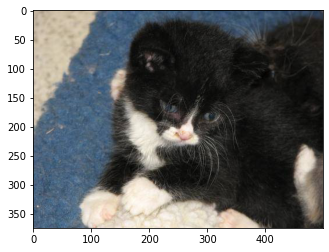

0 cat


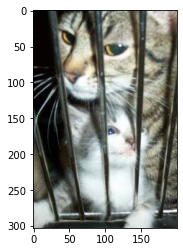

0 cat


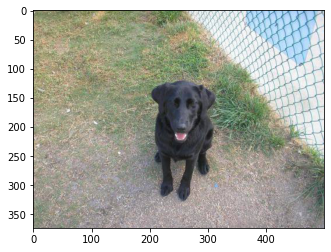

1 dog


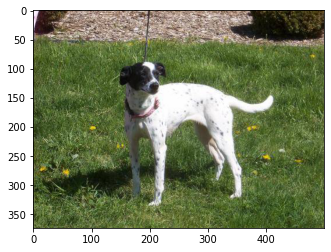

0 cat


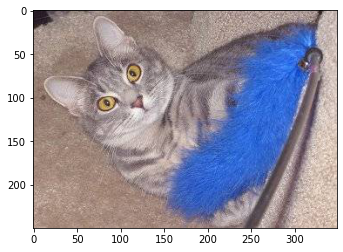

0 cat


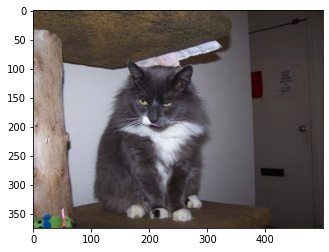

1 dog


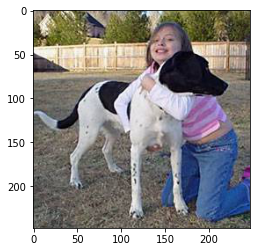

0 cat


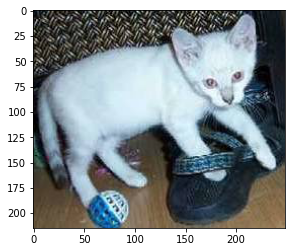

0 cat


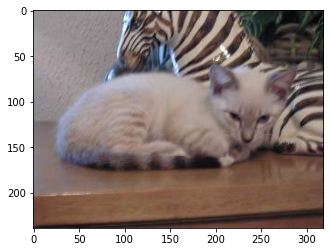

0 cat


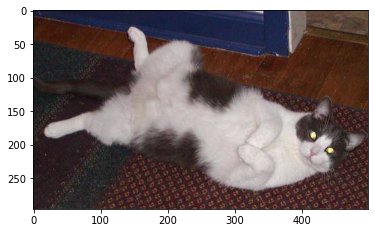

In [214]:
for i in my_list[:10]:
    im=Image.open('test1/'+i)
    im=im.resize(Image_Size)
    im=np.expand_dims(im,axis=0)
    im=np.array(im)
    im=im/255
    pred=model.predict_classes([im])[0]
    print(pred,results[pred])
    image = imread('test1/'+i)
    pyplot.imshow(image)
    pyplot.show()

   

    

In [190]:
my_list

['9733.jpg',
 '63.jpg',
 '6400.jpg',
 '823.jpg',
 '4217.jpg',
 '3578.jpg',
 '10321.jpg',
 '2666.jpg',
 '5109.jpg',
 '11981.jpg',
 '10447.jpg',
 '2100.jpg',
 '11759.jpg',
 '4571.jpg',
 '7078.jpg',
 '12250.jpg',
 '1409.jpg',
 '9055.jpg',
 '6366.jpg',
 '12244.jpg',
 '189.jpg',
 '9041.jpg',
 '6372.jpg',
 '11995.jpg',
 '10453.jpg',
 '2114.jpg',
 '4565.jpg',
 '4203.jpg',
 '10335.jpg',
 '2672.jpg',
 '9727.jpg',
 '6414.jpg',
 '77.jpg',
 '8439.jpg',
 '837.jpg',
 '2882.jpg',
 '3544.jpg',
 '11003.jpg',
 '5135.jpg',
 '1353.jpg',
 '7722.jpg',
 '8411.jpg',
 '7044.jpg',
 '8377.jpg',
 '1435.jpg',
 '9069.jpg',
 '5653.jpg',
 '3222.jpg',
 '11765.jpg',
 '5647.jpg',
 '2128.jpg',
 '3236.jpg',
 '11771.jpg',
 '4559.jpg',
 '7050.jpg',
 '8363.jpg',
 '12278.jpg',
 '1421.jpg',
 '6428.jpg',
 '1347.jpg',
 '7736.jpg',
 '8405.jpg',
 '2896.jpg',
 '3550.jpg',
 '11017.jpg',
 '10309.jpg',
 '5121.jpg',
 '9928.jpg',
 '638.jpg',
 '7905.jpg',
 '9096.jpg',
 '8388.jpg',
 '12293.jpg',
 '5874.jpg',
 '11942.jpg',
 '10484.jpg',
 '